## URL
<a> https://universe.roboflow.com/nazarbayev-intellectual-school-phm-astana/ai_dahar/dataset/1 </a>

In [2]:
!pip install ultralytics
!pip install roboflow

In [3]:
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image


In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="EixuzxbybAFPCmGCDgja")
project = rf.workspace("nazarbayev-intellectual-school-phm-astana").project("ai_dahar")
dataset = project.version(1).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.234, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to AI_dahar-1 in yolov8:: 100%|██████████| 55930/55930 [00:14<00:00, 3823.65it/s]


In [5]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/AI_dahar-1/data.yaml epochs=15 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 157MB/s]
Ultralytics YOLOv8.0.234 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/AI_dahar-1/data.yaml, epochs=15, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

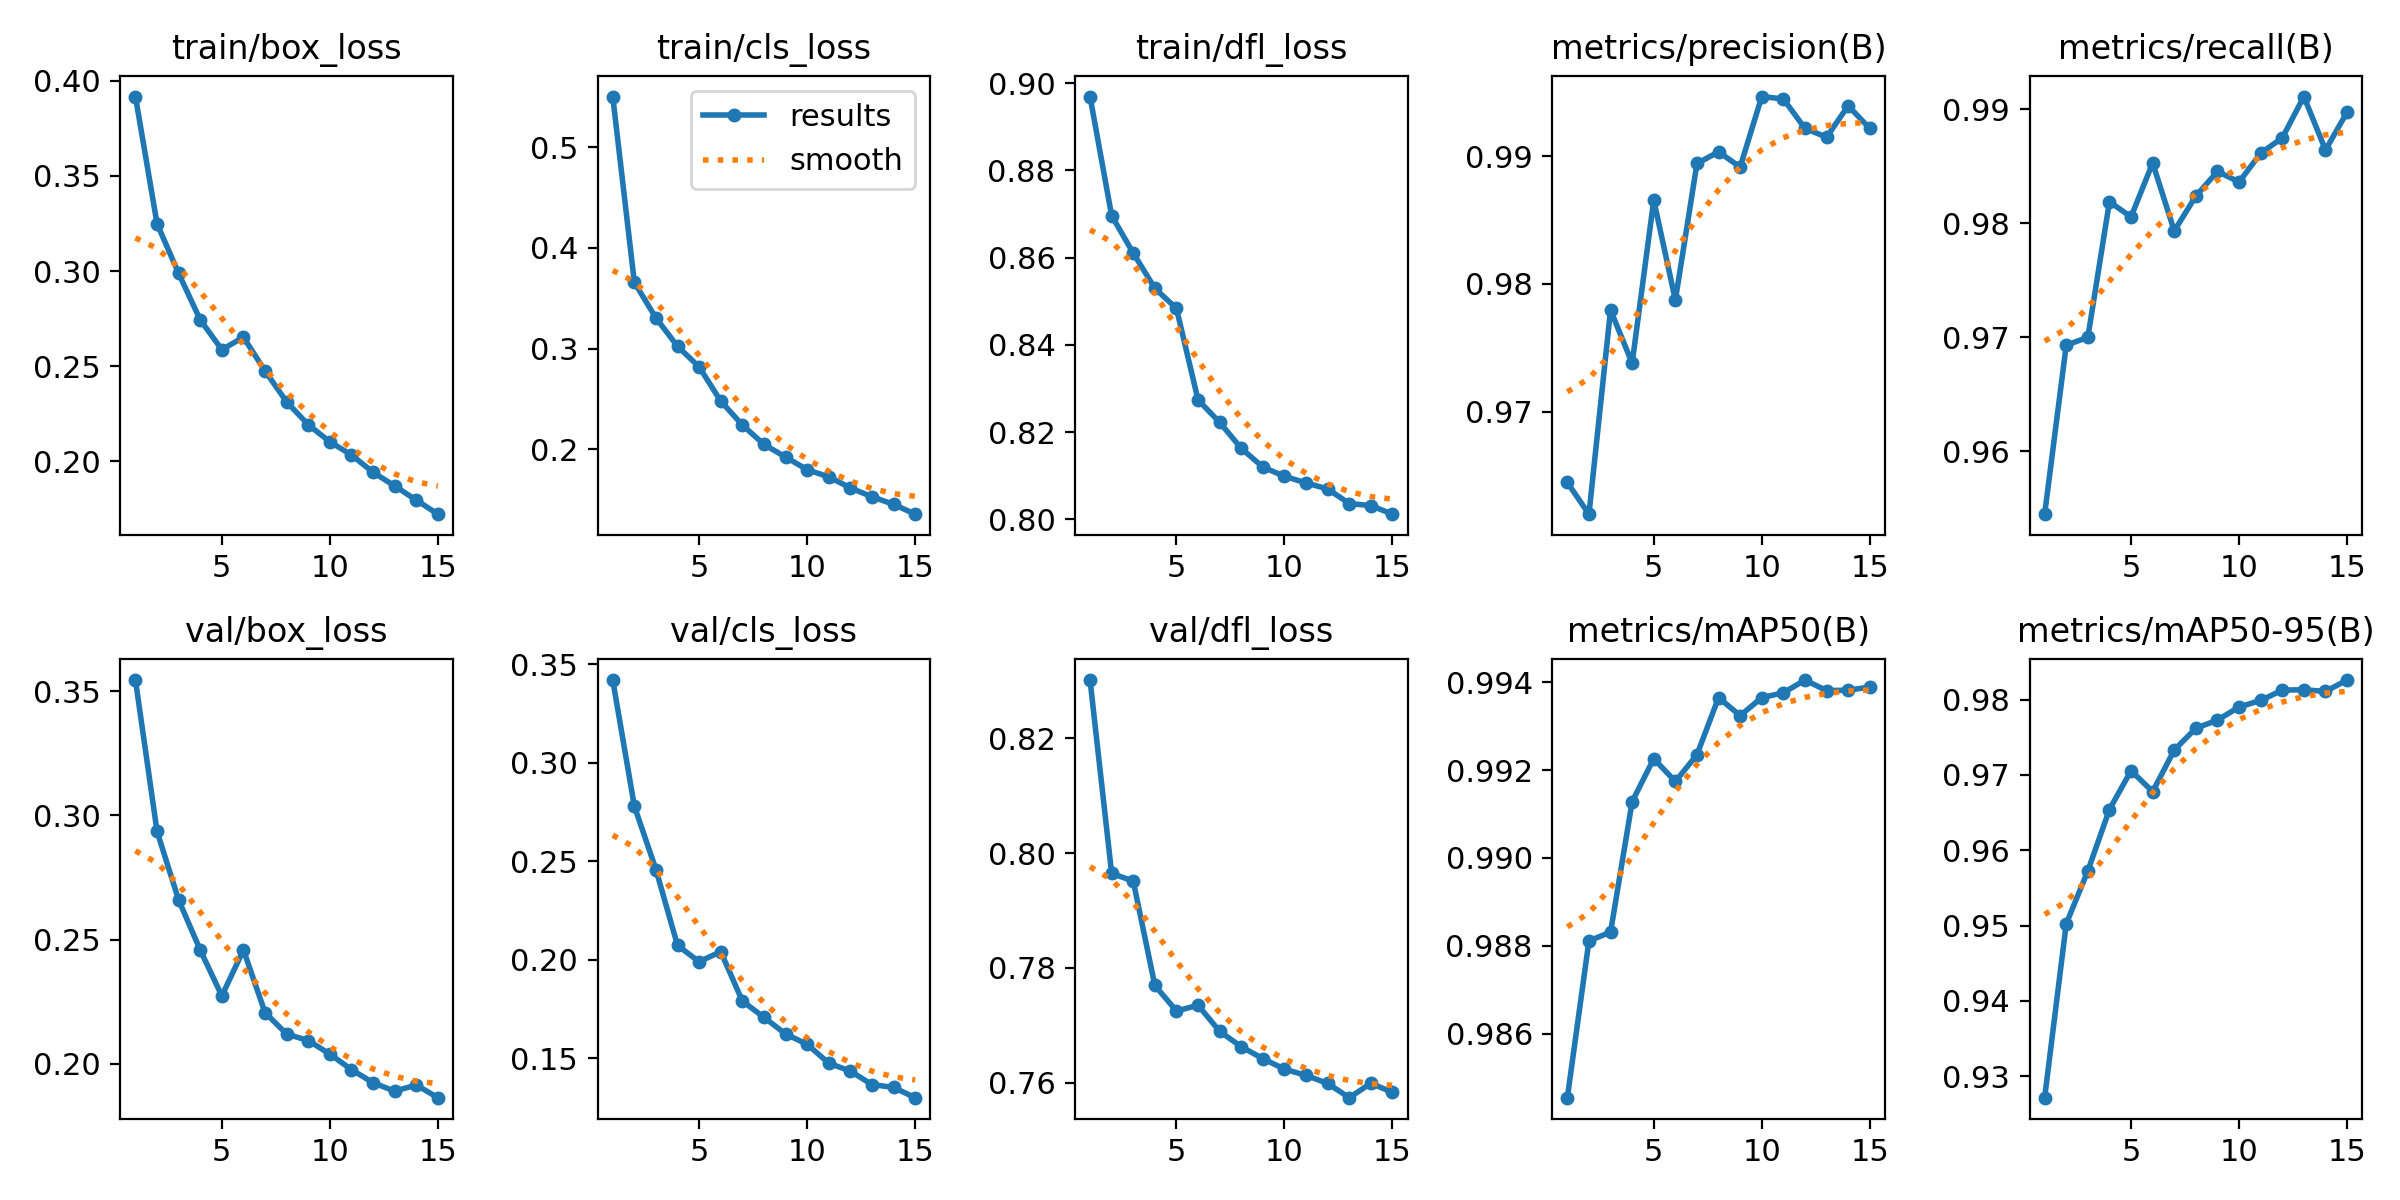

In [7]:
# VIEW MODEL TRANING CHARTS
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [9]:
# VALIDATION
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/AI_dahar-1/data.yaml

Ultralytics YOLOv8.0.234 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/AI_dahar-1/valid/labels.cache... 825 images, 0 backgrounds, 0 corrupt: 100% 825/825 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 52/52 [00:16<00:00,  3.24it/s]
                   all        825       1980      0.992       0.99      0.994      0.983
                  fire        825       1442      0.992      0.983      0.993      0.973
                 smoke        825        538      0.993      0.996      0.995      0.992
Speed: 1.1ms preprocess, 9.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


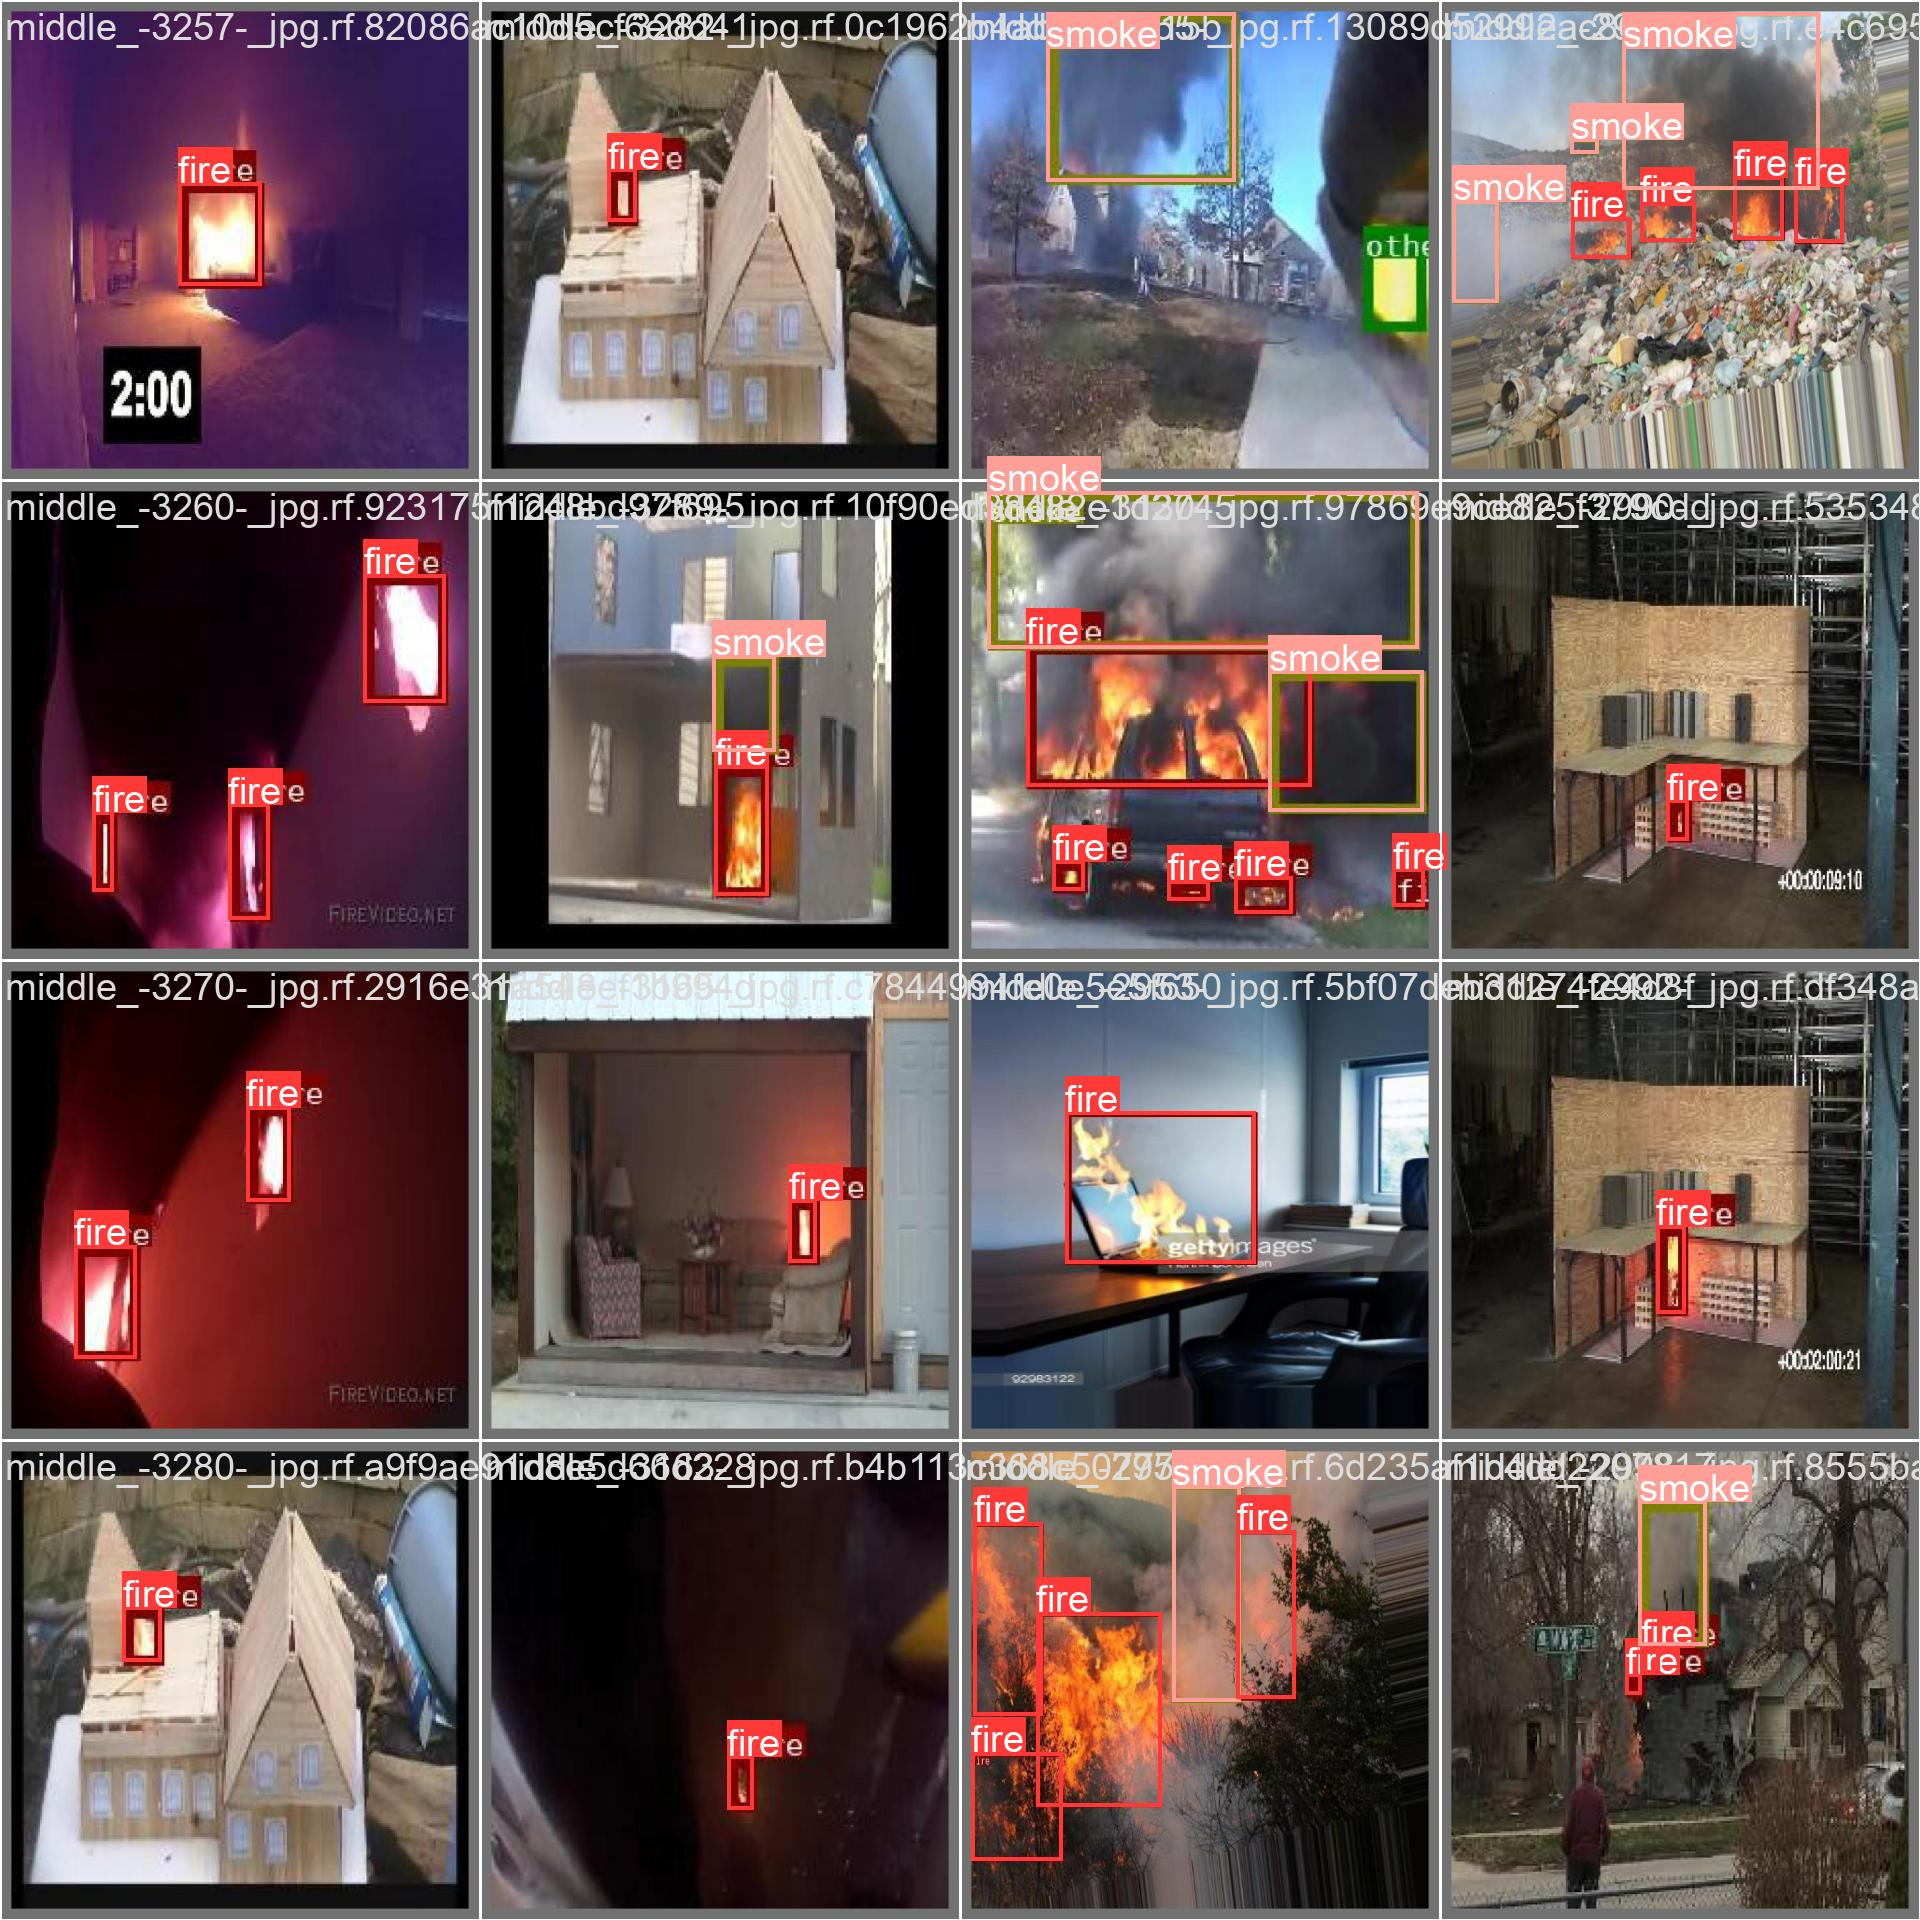

In [10]:
Image(filename=f'/content/runs/detect/val/val_batch1_labels.jpg')